## 1

Perceptron classification accuracy 1.0


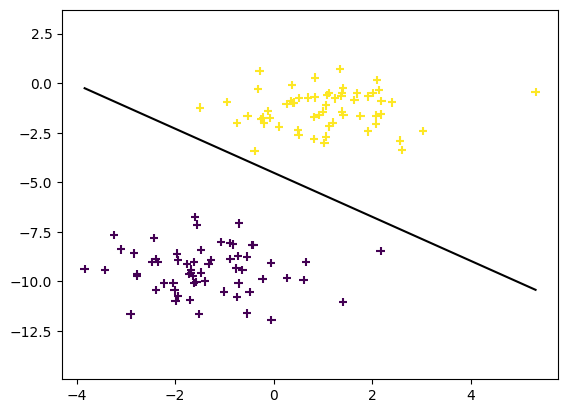

In [10]:
import numpy as np
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y > 0 , 1, 0)
        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias

        y_predicted = self.activation_func(linear_output)
        return y_predicted


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)
    print("Perceptron classification accuracy", accuracy(y_test, predictions))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="+", c=y_train)
    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])
    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])
    plt.show()


Perceptron classification accuracy 1.0


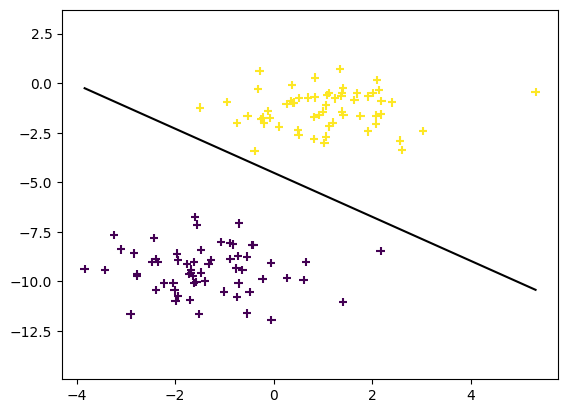

In [11]:
## compressed version for 1
import numpy as np

step = lambda x: np.where(x > 0, 1, 0)

class Perceptron:
    def __init__(self, lr=0.01, n=1000):
        self.lr, self.n = lr, n

    def fit(self, X, y):
        self.w, self.b = np.zeros(X.shape[1]), 0
        y = np.where(y > 0, 1, 0)
        for _ in range(self.n):
            for i, x in enumerate(X):
                u = self.lr * (y[i] - step(np.dot(x, self.w) + self.b))
                self.w += u * x; self.b += u

    def predict(self, X):
        return step(np.dot(X, self.w) + self.b)


# Test
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    acc = lambda y, p: np.mean(y == p)

    X, y = datasets.make_blobs(150, 2, centers=2, cluster_std=1.05, random_state=2)
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=123)

    p = Perceptron()
    p.fit(Xtr, ytr)
    pred = p.predict(Xte)

    print("Perceptron classification accuracy", acc(yte, pred))

    x1, x2 = Xtr[:,0].min(), Xtr[:,0].max()
    y1, y2 = (-p.w[0]*x1 - p.b)/p.w[1], (-p.w[0]*x2 - p.b)/p.w[1]

    plt.scatter(Xtr[:,0], Xtr[:,1], c=ytr, marker="+")
    plt.plot([x1, x2], [y1, y2], "k")
    plt.ylim(Xtr[:,1].min()-3, Xtr[:,1].max()+3)
    plt.show()


## 2

Epoch 1/15
422/422 - 7s - 18ms/step - accuracy: 0.8428 - loss: 0.5482 - val_accuracy: 0.9562 - val_loss: 0.1599
Epoch 2/15
422/422 - 3s - 8ms/step - accuracy: 0.9219 - loss: 0.2659 - val_accuracy: 0.9672 - val_loss: 0.1139
Epoch 3/15
422/422 - 3s - 7ms/step - accuracy: 0.9372 - loss: 0.2110 - val_accuracy: 0.9742 - val_loss: 0.0902
Epoch 4/15
422/422 - 3s - 7ms/step - accuracy: 0.9461 - loss: 0.1784 - val_accuracy: 0.9757 - val_loss: 0.0816
Epoch 5/15
422/422 - 4s - 10ms/step - accuracy: 0.9523 - loss: 0.1589 - val_accuracy: 0.9752 - val_loss: 0.0808
Epoch 6/15
422/422 - 3s - 7ms/step - accuracy: 0.9574 - loss: 0.1403 - val_accuracy: 0.9773 - val_loss: 0.0739
Epoch 7/15
422/422 - 3s - 7ms/step - accuracy: 0.9601 - loss: 0.1320 - val_accuracy: 0.9808 - val_loss: 0.0667
Epoch 8/15
422/422 - 3s - 7ms/step - accuracy: 0.9619 - loss: 0.1215 - val_accuracy: 0.9817 - val_loss: 0.0667
Epoch 9/15
422/422 - 5s - 12ms/step - accuracy: 0.9652 - loss: 0.1129 - val_accuracy: 0.9812 - val_loss: 0.067

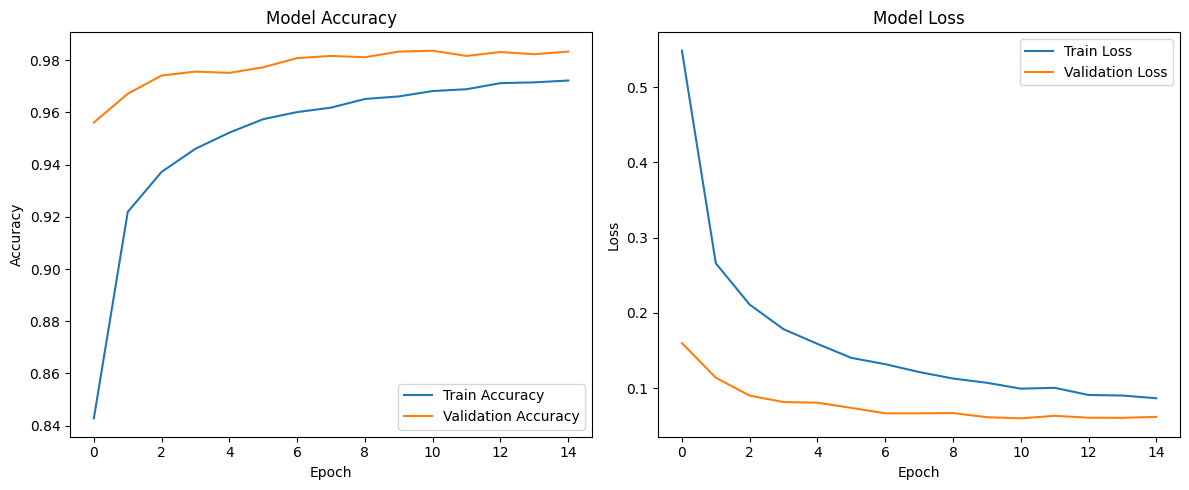


Model saved as 'mlp_mnist_model.h5'


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# 2. Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape the data (28x28 images → 784 features)
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Build the MLP Model with Dropout and Batch Normalization
model = models.Sequential([
    layers.Dense(128, input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 5. Train the Model and Store Training History
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)
# 6. Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 7. Plot Training Curves (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Save the Trained Model
model.save("mlp_mnist_model.h5")
print("\nModel saved as 'mlp_mnist_model.h5'")


Epoch 1/15
422/422 - 5s - 13ms/step - accuracy: 0.8425 - loss: 0.5441 - val_accuracy: 0.9550 - val_loss: 0.1644
Epoch 2/15
422/422 - 3s - 7ms/step - accuracy: 0.9209 - loss: 0.2681 - val_accuracy: 0.9675 - val_loss: 0.1167
Epoch 3/15
422/422 - 5s - 12ms/step - accuracy: 0.9360 - loss: 0.2119 - val_accuracy: 0.9700 - val_loss: 0.0999
Epoch 4/15
422/422 - 3s - 7ms/step - accuracy: 0.9470 - loss: 0.1785 - val_accuracy: 0.9785 - val_loss: 0.0802
Epoch 5/15
422/422 - 3s - 7ms/step - accuracy: 0.9515 - loss: 0.1593 - val_accuracy: 0.9808 - val_loss: 0.0765
Epoch 6/15
422/422 - 4s - 9ms/step - accuracy: 0.9560 - loss: 0.1460 - val_accuracy: 0.9770 - val_loss: 0.0762
Epoch 7/15
422/422 - 3s - 7ms/step - accuracy: 0.9613 - loss: 0.1258 - val_accuracy: 0.9807 - val_loss: 0.0657
Epoch 8/15
422/422 - 3s - 7ms/step - accuracy: 0.9638 - loss: 0.1186 - val_accuracy: 0.9800 - val_loss: 0.0658
Epoch 9/15
422/422 - 3s - 7ms/step - accuracy: 0.9655 - loss: 0.1127 - val_accuracy: 0.9820 - val_loss: 0.0674

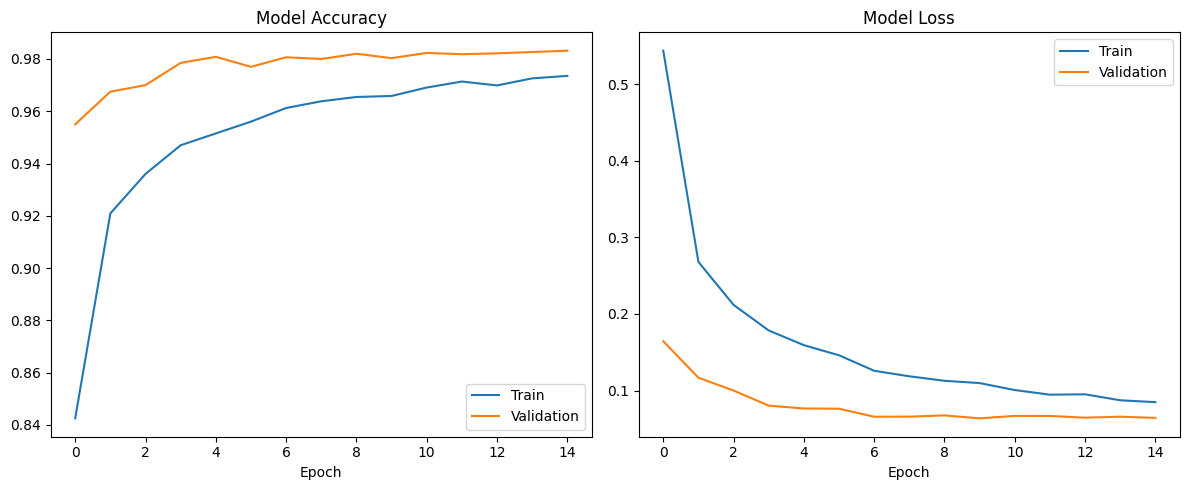


Model saved as 'mlp_mnist_model.h5'


In [13]:
# compresed version for 2
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load & preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 784).astype("float32") / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Build model
model = models.Sequential([
    layers.Dense(128, input_shape=(784,)),
    layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.3),
    layers.Dense(64),
    layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile & train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, batch_size=128,
                    validation_split=0.1, verbose=2)

# Evaluate
acc = model.evaluate(x_test, y_test, verbose=0)[1]
print(f"\nTest Accuracy: {acc:.4f}")

# Plot metrics
plt.figure(figsize=(12,5))
for i, m in enumerate([('accuracy','Accuracy'), ('loss','Loss')], 1):
    plt.subplot(1,2,i)
    plt.plot(history.history[m[0]], label='Train')
    plt.plot(history.history['val_'+m[0]], label='Validation')
    plt.title(f"Model {m[1]}"); plt.xlabel('Epoch'); plt.legend()
plt.tight_layout(); plt.show()

# Save model
model.save("mlp_mnist_model.h5")
print("\nModel saved as 'mlp_mnist_model.h5'")


## 3 

In [14]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# 2. Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 3. Normalize Pixel Values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0
# 4. Convert Labels to One-Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 5. Function to Create and Train a Simple Model with Different Activations
def test_activation(activation):
    print(f"\nTraining with activation = {activation}")
    # Build Model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    # Compile Model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    # Train Model (2 epochs for quick comparison)
    model.fit(x_train, y_train, epochs=2, batch_size=128, verbose=1)
    # Evaluate Model
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy with {activation}: {acc:.4f}")
# 6. Try Different Activation Functions
for act in ['relu', 'sigmoid', 'tanh']:
    test_activation(act)



Training with activation = relu
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8031 - loss: 0.7131
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9360 - loss: 0.2185
Test Accuracy with relu: 0.9528

Training with activation = sigmoid
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7129 - loss: 1.1956
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9108 - loss: 0.3385
Test Accuracy with sigmoid: 0.9261

Training with activation = tanh
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8002 - loss: 0.7077
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9328 - loss: 0.2387
Test Accuracy with tanh: 0.9432


In [15]:
#compressed version for 3
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load & preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Train & evaluate model with different activations
def test_activation(act):
    print(f"\nTraining with activation = {act}")
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation=act),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=2, batch_size=128, verbose=1)
    acc = model.evaluate(x_test, y_test, verbose=0)[1]
    print(f"Test Accuracy with {act}: {acc:.4f}")

for act in ('relu', 'sigmoid', 'tanh'):
    test_activation(act)



Training with activation = relu
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7972 - loss: 0.7190
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9350 - loss: 0.2273
Test Accuracy with relu: 0.9483

Training with activation = sigmoid
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7365 - loss: 1.1472
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9104 - loss: 0.3354
Test Accuracy with sigmoid: 0.9246

Training with activation = tanh
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8092 - loss: 0.7018
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9326 - loss: 0.2362
Test Accuracy with tanh: 0.9441


## 4

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3527 - loss: 1.7482 - val_accuracy: 0.5435 - val_loss: 1.2600
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.5584 - loss: 1.2260 - val_accuracy: 0.6097 - val_loss: 1.0948
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6259 - loss: 1.0576 - val_accuracy: 0.6474 - val_loss: 0.9880
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.6742 - loss: 0.9318 - val_accuracy: 0.6709 - val_loss: 0.9444
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7004 - loss: 0.8497 - val_accuracy: 0.6895 - val_loss: 0.8817
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.7289 - loss: 0.7750 - val_accuracy: 0.7046 - val_loss: 0.8725
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.7436 - loss: 0.7331 - val_accuracy: 0.6986 - val_loss: 0.8841
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7621 -

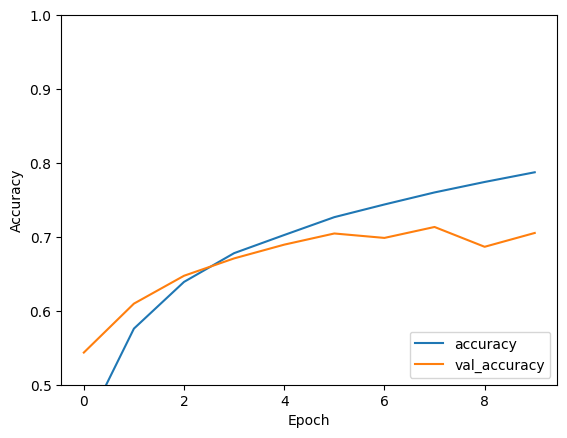

313/313 - 5s - 15ms/step - accuracy: 0.7053 - loss: 0.8910
Test Accuracy: 0.705299973487854
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
cat


In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# 1. Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# 2. Build the CNN model
model = models.Sequential()
# Convolutional Base
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Dense Layers (Classifier)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # Output layer with 10 units for 10 classes
# 3. Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 4. Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
# 5. Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test Accuracy: {test_acc}")
# Make predictions on a sample image
predictions = model.predict(test_images)
print(class_names[tf.argmax(predictions[0])])


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.3560 - loss: 1.7337 - val_accuracy: 0.5482 - val_loss: 1.2664
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 48ms/step - accuracy: 0.5747 - loss: 1.2034 - val_accuracy: 0.6021 - val_loss: 1.1279
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6406 - loss: 1.0180 - val_accuracy: 0.6272 - val_loss: 1.0760
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6773 - loss: 0.9180 - val_accuracy: 0.6649 - val_loss: 0.9560
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7079 - loss: 0.8295 - val_accuracy: 0.6772 - val_loss: 0.9194
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7376 - loss: 0.7575 - val_accuracy: 0.6978 - val_loss: 0.8705
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7481 - loss: 0.7179 - val_accuracy: 0.7109 - val_loss: 0.8683
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 51ms/step - accuracy: 0.7693 

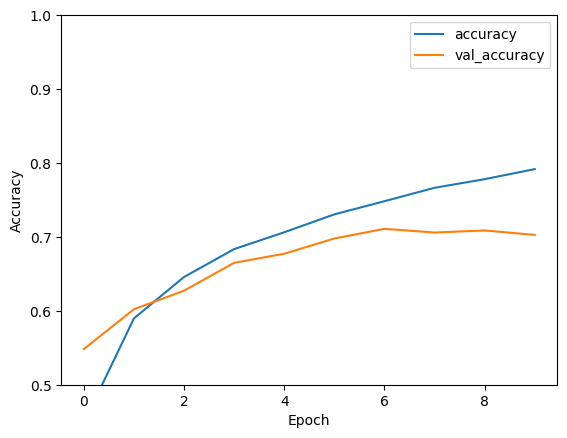

313/313 - 5s - 16ms/step - accuracy: 0.7027 - loss: 0.9130
Test Accuracy: 0.7027000188827515
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
cat


In [17]:
## compressed version for 4
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load & normalize data
(x_tr, y_tr), (x_te, y_te) = datasets.cifar10.load_data()
x_tr, x_te = x_tr/255.0, x_te/255.0

classes = ['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck']

# Model
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile & train
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

h = model.fit(x_tr, y_tr, epochs=10, validation_data=(x_te, y_te))

# Plot accuracy
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.ylim([0.5,1]); plt.legend(); plt.show()

# Evaluate & predict
print("Test Accuracy:", model.evaluate(x_te, y_te, verbose=2)[1])
pred = model.predict(x_te)
print(classes[tf.argmax(pred[0])])


## 5

In [18]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import numpy as np
# 2. Load and Preprocess the IMDB Dataset
VOCAB_SIZE = 10000     # Only keep the top 10,000 most frequent words
MAXLEN = 200           # Pad or truncate each review to 200 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)
# Pad sequences to make all reviews the same length
x_train = pad_sequences(x_train, maxlen=MAXLEN)
x_test = pad_sequences(x_test, maxlen=MAXLEN)
# 3. Build the Simple RNN Model
rnn_model = Sequential([
    Embedding(VOCAB_SIZE, 32, input_length=MAXLEN),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
# 4. Compile and Train the Simple RNN Model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=2)
# 5. Evaluate the Simple RNN Model
rnn_loss, rnn_acc = rnn_model.evaluate(x_test, y_test, verbose=0)
print(f"\nSimpleRNN Test Accuracy: {rnn_acc:.4f}")
# 6. Build the LSTM Model
lstm_model = Sequential([
    Embedding(VOCAB_SIZE, 32, input_length=MAXLEN),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
# 7. Compile and Train the LSTM Model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=2)
# 8. Evaluate the LSTM Model
lstm_loss, lstm_acc = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_acc:.4f}")
# 9. Predict on a Random Sample Review
index = np.random.randint(0, len(x_test))
sample = x_test[index:index+1]
true_label = y_test[index]
rnn_pred = rnn_model.predict(sample)[0][0]
lstm_pred = lstm_model.predict(sample)[0][0]
# 10. Decode the Review Text
def decode_review(sequence):
    word_index = imdb.get_word_index()
    reverse_word_index = {v+3: k for k, v in word_index.items()}
    reverse_word_index[0] = "<PAD>"
    reverse_word_index[1] = "<START>"
    reverse_word_index[2] = "<UNK>"
    reverse_word_index[3] = "<UNUSED>"
    return " ".join([reverse_word_index.get(i, "?") for i in sequence])
decoded_review = decode_review(x_test[index])
# 11. Display the Results
print("\n==")
print("Sample Review:\n")
print(decoded_review)
print("\nTrue Label:", "Positive" if true_label == 1 else "Negative")
print(f"RNN Prediction:  {rnn_pred:.3f} → {'Positive' if rnn_pred > 0.5 else 'Negative'}")
print(f"LSTM Prediction: {lstm_pred:.3f} → {'Positive' if lstm_pred > 0.5 else 'Negative'}")
print("==")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 - 20s - 130ms/step - accuracy: 0.7038 - loss: 0.5632 - val_accuracy: 0.8106 - val_loss: 0.4315
Epoch 2/3
157/157 - 11s - 68ms/step - accuracy: 0.8063 - loss: 0.4279 - val_accuracy: 0.8428 - val_loss: 0.3760
Epoch 3/3
157/157 - 21s - 137ms/step - accuracy: 0.8987 - loss: 0.2607 - val_accuracy: 0.8584 - val_loss: 0.3372

SimpleRNN Test Accuracy: 0.8572
Epoch 1/3
157/157 - 27s - 172ms/step - accuracy: 0.7635 - loss: 0.4809 - val_accuracy: 0.8610 - val_loss: 0.3287
Epoch 2/3
157/157 - 40s - 258ms/step - accuracy: 0.8995 - loss: 0.2546 - val_accuracy: 0.8658 - val_loss: 0.3172
Epoch 3/3
157/157 - 38s - 243ms/step - accuracy: 0.9319 - loss: 0.1911 - val_accuracy: 0.8710 - val_loss: 0.3303
LSTM Test Accuracy: 0.8596
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

==
Sample Review:

movie so why not and once again this movie thrilled me it is so easy so watchable and so human that i don't know why some peop

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import numpy as np

V, L = 10000, 200
(xtr, ytr), (xte, yte) = imdb.load_data(num_words=V)
xtr = pad_sequences(xtr, maxlen=L)
xte = pad_sequences(xte, maxlen=L)

def build(cell):
    return Sequential([
        Embedding(V, 32, input_length=L),
        cell(32),
        Dense(1, activation='sigmoid')
    ])

nets = {'SimpleRNN': SimpleRNN, 'LSTM': LSTM}
trained = {}

for n, c in nets.items():
    m = build(c)
    m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    m.fit(xtr, ytr, epochs=3, batch_size=128, validation_split=0.2, verbose=2)
    print(f"\n{n} Test Accuracy: {m.evaluate(xte, yte, verbose=0)[1]:.4f}")
    trained[n] = m

i = np.random.randint(len(xte))
s, lbl = xte[i:i+1], yte[i]
rnn_p  = trained['SimpleRNN'].predict(s, verbose=0)[0][0]
lstm_p = trained['LSTM'].predict(s, verbose=0)[0][0]

wi = imdb.get_word_index()
rev = {v+3:k for k,v in wi.items()} | {0:'<PAD>',1:'<START>',2:'<UNK>',3:'<UNUSED>'}
text = " ".join(rev.get(j,'?') for j in xte[i])

print("\n==\nSample Review:\n")
print(text)
print("\nTrue Label:", "Positive" if lbl else "Negative")
print(f"RNN Prediction:  {rnn_p:.3f} → {'Positive' if rnn_p>0.5 else 'Negative'}")
print(f"LSTM Prediction: {lstm_p:.3f} → {'Positive' if lstm_p>0.5 else 'Negative'}")
print("==")


Epoch 1/3
157/157 - 14s - 91ms/step - accuracy: 0.6335 - loss: 0.6238 - val_accuracy: 0.8022 - val_loss: 0.4479
Epoch 2/3
157/157 - 11s - 69ms/step - accuracy: 0.8415 - loss: 0.3705 - val_accuracy: 0.7930 - val_loss: 0.4414
Epoch 3/3
157/157 - 11s - 70ms/step - accuracy: 0.8934 - loss: 0.2755 - val_accuracy: 0.8176 - val_loss: 0.4108

SimpleRNN Test Accuracy: 0.8218
Epoch 1/3
157/157 - 25s - 156ms/step - accuracy: 0.7546 - loss: 0.4989 - val_accuracy: 0.8672 - val_loss: 0.3302
Epoch 2/3
157/157 - 41s - 263ms/step - accuracy: 0.8978 - loss: 0.2646 - val_accuracy: 0.8538 - val_loss: 0.3426
Epoch 3/3
157/157 - 23s - 147ms/step - accuracy: 0.9301 - loss: 0.1936 - val_accuracy: 0.8716 - val_loss: 0.3388

LSTM Test Accuracy: 0.8602



==
Sample Review:

car in the beginning of the movie goes to bar is approached by a biker gang who ruins his chances with a very lovely lady offer him a job he goes back to their place refuses the police ask him to accept their ya go what plays out is a very annoying little film that sees the hero not really do all that much and a biker gang that can kill and for some reason the police can not pin a crime on them i am not sure why the female biker did what she did at the end but hey it is a bad movie you always get scenes that make little sense i am still trying to figure out if i <UNK> it when they said the hero of the piece was a stunt car driver they may have said stock car driver because why would a stunt <UNK> be racing and i wouldn't think it would be all that <UNK> for a stunt car to crash the actors are bad and all the <UNK> are pretty annoying and the hero is kind of incompetent really this movie is not full of kicks but it is the <UNK>

True Label: Negative
RNN Prediction:  

## 6

Precision: 0.75
Recall: 0.75
F1-Score: 0.75


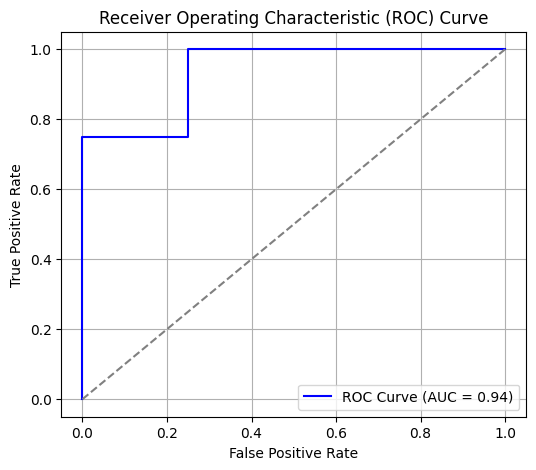

In [20]:
#Import Required Libraries
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
# 2. Define True Labels and Predicted Outputs
y_true = [1, 0, 1, 1, 0, 0, 1, 0]     # Actual class labels
y_pred = [1, 0, 1, 0, 0, 1, 1, 0]     # Predicted class labels
y_prob = [0.9, 0.2, 0.8, 0.4, 0.3, 0.7, 0.85, 0.1]   # Predicted probabilities (for ROC)
# 3. Calculate Evaluation Metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
# 4. Display the Metrics
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1-Score:", round(f1, 2))
# 5. Generate ROC Curve Values
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
# 6. Plot the ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label="ROC Curve (AUC = %.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## 7


Training using optimizer: sgd


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5458 - loss: 1.6613 - val_accuracy: 0.8775 - val_loss: 0.6343
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8544 - loss: 0.6351 - val_accuracy: 0.9015 - val_loss: 0.4250
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8782 - loss: 0.4788 - val_accuracy: 0.9110 - val_loss: 0.3562
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8893 - loss: 0.4162 - val_accuracy: 0.9170 - val_loss: 0.3198
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8983 - loss: 0.3787 - val_accuracy: 0.9227 - val_loss: 0.2985
Test Accuracy with sgd: 0.9074

Training using optimizer: rmsprop
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8413 - loss: 0.5852 - val_accuracy: 0.9525 - val_loss: 0.1683
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9446 - loss: 0.1896 - val_accuracy: 0.9683 - val_loss: 0.1221
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms

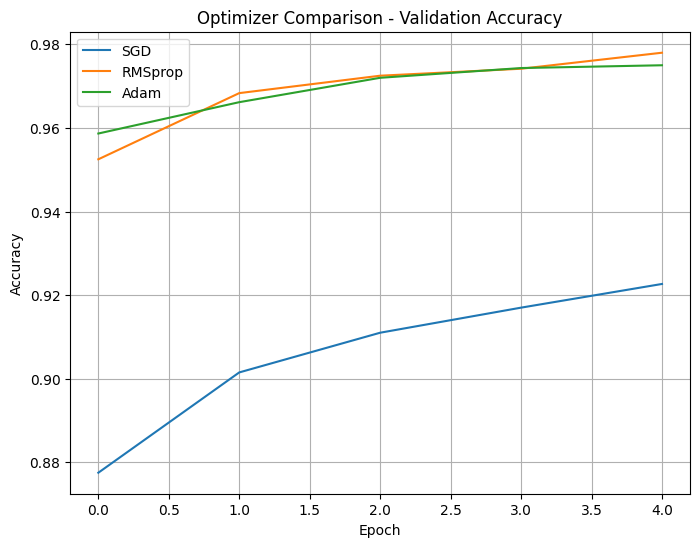

In [21]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 2. Function to Build and Train Model with Different Optimizers
def train_with_optimizer(optimizer_name):
    print(f"\nTraining using optimizer: {optimizer_name}")

    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer_name,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=128,
        validation_split=0.1,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy with {optimizer_name}: {test_acc:.4f}")

    return history

# 3. Train Models with Different Optimizers
history_sgd = train_with_optimizer('sgd')
history_rmsprop = train_with_optimizer('rmsprop')
history_adam = train_with_optimizer('adam')

# 4. Plot Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop')
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.title('Optimizer Comparison - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show() 


## 8 

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=5,
          validation_data=(x_test, y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 149ms/step - accuracy: 0.3349 - loss: 1.8116 - val_accuracy: 0.5206 - val_loss: 1.3665
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 154ms/step - accuracy: 0.5170 - loss: 1.3482 - val_accuracy: 0.6116 - val_loss: 1.1233
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.5781 - loss: 1.1999 - val_accuracy: 0.6330 - val_loss: 1.0404
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.6032 - loss: 1.1287 - val_accuracy: 0.6526 - val_loss: 0.9972
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.6276 - loss: 1.0691 - val_accuracy: 0.6664 - val_loss: 0.9598


## 9

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 | D Loss: 0.8847 | G Loss: 0.6990
Epoch 500 | D Loss: 5.3585 | G Loss: 0.0044
Epoch 1000 | D Loss: 5.9740 | G Loss: 0.0022
Epoch 1500 | D Loss: 6.3293 | G Loss: 0.0015
Epoch 2000 | D Loss: 6.5817 | G Loss: 0.0011
Epoch 2500 | D Loss: 6.7789 | G Loss: 0.0009
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


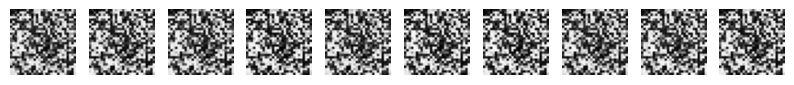

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Normalize data (-1 to 1)
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

BUFFER_SIZE = x_train.shape[0]
BATCH_SIZE = 256
LATENT_DIM = 100
EPOCHS = 3000

# ------------------
# Generator Model
# ------------------
generator = Sequential([
    Dense(256, input_dim=LATENT_DIM),
    LeakyReLU(0.2),
    Dense(512),
    LeakyReLU(0.2),
    Dense(1024),
    LeakyReLU(0.2),
    Dense(28 * 28, activation='tanh'),
    Reshape((28, 28, 1))
])

# ------------------
# Discriminator Model
# ------------------
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512),
    LeakyReLU(0.2),
    Dense(256),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])

discriminator.compile(
    optimizer=Adam(0.0002, 0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ------------------
# GAN Model
# ------------------
discriminator.trainable = False

gan = Sequential([
    generator,
    discriminator
])

gan.compile(
    optimizer=Adam(0.0002, 0.5),
    loss='binary_crossentropy'
)

# ------------------
# Training Loop
# ------------------
for epoch in range(EPOCHS):

    # Train Discriminator
    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    real_imgs = x_train[idx]

    noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
    fake_imgs = generator.predict(noise, verbose=0)

    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((BATCH_SIZE, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((BATCH_SIZE, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
    g_loss = gan.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss[0]:.4f} | G Loss: {g_loss:.4f}")

# ------------------
# Generate Images
# ------------------
noise = np.random.normal(0, 1, (10, LATENT_DIM))
generated_images = generator.predict(noise)

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()
